In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# load the dataset 

diab = pd.read_csv(r"C:\Users\srini\satvik\diabetes_binary_5050split.csv", header=0)

# copy the file to back-up file

diab_bk = diab.copy()

# display first 5 records

diab.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# Display diabetes data information

diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

diabetes_count = diab.Diabetes_binary.value_counts()
print('Class 0:', diabetes_count[0])
print('Class 1:', diabetes_count[1])
print('Proportion:', round(diabetes_count[0] /diabetes_count[1], 2), ': 1')
print('Total loans Trans:', len(diab))

Class 0: 35346
Class 1: 35346
Proportion: 1.0 : 1
Total loans Trans: 70692


In [5]:
#Missing Values
diab.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#For outliers
# Identify the numerical and categorical variables 
num_vars = diab.columns[diab.dtypes != 'object']
cat_vars = diab.columns[diab.dtypes == 'object']
print(num_vars) 
print(cat_vars) 

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index([], dtype='object')


In [7]:
#look it in graphs session

In [8]:
diab.shape

(70692, 22)

In [9]:
diab['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [10]:
diab['HighBP'].value_counts()

1.0    39832
0.0    30860
Name: HighBP, dtype: int64

In [11]:
diab['HighChol'].value_counts()

1.0    37163
0.0    33529
Name: HighChol, dtype: int64

In [12]:
diab['CholCheck'].value_counts()

1.0    68943
0.0     1749
Name: CholCheck, dtype: int64

In [13]:
diab['BMI'].value_counts()

27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64

In [14]:
diab['Smoker'].value_counts()

0.0    37094
1.0    33598
Name: Smoker, dtype: int64

In [15]:
diab['Stroke'].value_counts()

0.0    66297
1.0     4395
Name: Stroke, dtype: int64

In [16]:
diab['HeartDiseaseorAttack'].value_counts()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

In [17]:
diab['PhysActivity'].value_counts()

1.0    49699
0.0    20993
Name: PhysActivity, dtype: int64

In [18]:
diab['Fruits'].value_counts()

1.0    43249
0.0    27443
Name: Fruits, dtype: int64

In [19]:
diab['Veggies'].value_counts()

1.0    55760
0.0    14932
Name: Veggies, dtype: int64

In [20]:
diab['HvyAlcoholConsump'].value_counts()

0.0    67672
1.0     3020
Name: HvyAlcoholConsump, dtype: int64

In [21]:
diab['AnyHealthcare'].value_counts()

1.0    67508
0.0     3184
Name: AnyHealthcare, dtype: int64

In [22]:
diab['NoDocbcCost'].value_counts()

0.0    64053
1.0     6639
Name: NoDocbcCost, dtype: int64

In [23]:
diab['GenHlth'].value_counts()

3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64

In [24]:
diab['MentHlth'].value_counts()

0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: MentHlth, dtype: int64

In [25]:
diab['PhysHlth'].value_counts()

0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: PhysHlth, dtype: int64

In [26]:
diab['DiffWalk'].value_counts()

0.0    52826
1.0    17866
Name: DiffWalk, dtype: int64

In [27]:
diab['Sex'].value_counts()

0.0    38386
1.0    32306
Name: Sex, dtype: int64

In [28]:
diab['Age'].value_counts()

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

In [29]:
diab['Education'].value_counts()

6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: Education, dtype: int64

In [30]:
diab['Income'].value_counts()

8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: Income, dtype: int64

In [31]:
# Eliminate the outlier in 'BMI' and write data to new file

BMI_UL = round(diab.BMI.mean() + 3 * diab.BMI.std(),3)
BMI_LL = round(diab.BMI.mean() - 3 * diab.BMI.std(),3)
diab1 = diab[(diab.BMI > BMI_LL) & (diab.BMI < BMI_UL)]
diab1.shape

(69891, 22)

In [32]:
# Eliminate the outlier in 'MentHlth' and write data to new file

MentHlth_UL = round(diab1.MentHlth.mean() + 3 * diab1.MentHlth.std(),3)
MentHlth_LL = round(diab1.MentHlth.mean() - 3 * diab1.MentHlth.std(),3)
diab2 = diab1[(diab1.MentHlth > MentHlth_LL) & (diab1.MentHlth < MentHlth_UL)]
diab2.shape

(65632, 22)

In [33]:
# Eliminate the outlier in 'PhysHlth' and write data to new file

PhysHlth_UL = round(diab2.PhysHlth.mean() + 3 * diab2.PhysHlth.std(),3)
PhysHlth_LL = round(diab2.PhysHlth.mean() - 3 * diab2.PhysHlth.std(),3)
diab3 = diab2[(diab2.PhysHlth > PhysHlth_LL) & (diab2.PhysHlth < PhysHlth_UL)]
diab3.shape

(65632, 22)

In [34]:
# Eliminate the outlier in 'Age' and write data to new file

Age_UL = round(diab3.Age.mean() + 3 * diab3.Age.std(),3)
Age_LL = round(diab3.Age.mean() - 3 * diab3.Age.std(),3)
diab4 = diab3[(diab3.Age > Age_LL) & (diab3.Age < Age_UL)]
diab4.shape

(65632, 22)

In [35]:
#Duplicates
# Displaying Duplicate values with in dataset

diabetes_dup =diab4[diab4.duplicated(keep='last')]
diabetes_dup

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
12,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
20,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
58,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
86,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66051,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
66912,1.0,0.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,5.0,5.0
67520,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,12.0,6.0,7.0
67591,1.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,7.0,6.0,8.0


In [36]:
# Remove the identified duplicate records 

diab4 = diab4.drop_duplicates()

In [37]:
# Display the shape of the dataset

diab4.shape

(63997, 22)

In [38]:
# Re-setting the row index

diab4 = diab4.reset_index(drop=True)
diab4.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [39]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

diabetes_count = diab4.Diabetes_binary.value_counts()
print('Class 0:', diabetes_count[0])
print('Class 1:', diabetes_count[1])
print('Proportion:', round(diabetes_count[0] /diabetes_count[1], 2), ': 1')
print('Total loans Trans:', len(diab4))

Class 0: 32203
Class 1: 31794
Proportion: 1.01 : 1
Total loans Trans: 63997


In [40]:
#correlation
diab4.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.371656,0.277526,0.116548,0.304038,0.075850,0.121111,0.205300,-0.143437,-0.043823,-0.071440,-0.096809,0.029806,0.030525,0.395343,0.041277,0.191535,0.256372,0.047931,0.284900,-0.157030,-0.209277
HighBP,0.371656,1.000000,0.308718,0.105541,0.252605,0.079735,0.124623,0.204496,-0.125593,-0.030084,-0.059528,-0.029431,0.042543,0.018484,0.307538,0.031397,0.157722,0.223000,0.038491,0.342368,-0.126101,-0.172233
HighChol,0.277526,0.308718,1.000000,0.088153,0.139289,0.082838,0.094321,0.175684,-0.078604,-0.038116,-0.034306,-0.026359,0.036634,0.021728,0.220658,0.051376,0.124361,0.150123,0.015313,0.242119,-0.069004,-0.090625
CholCheck,0.116548,0.105541,0.088153,1.000000,0.053082,-0.001557,0.023597,0.045198,-0.009039,0.015308,-0.001397,-0.024751,0.103448,-0.058244,0.065142,-0.009928,0.036386,0.046363,-0.008041,0.104192,-0.009460,0.002657
BMI,0.304038,0.252605,0.139289,0.053082,1.000000,0.008982,0.015652,0.061461,-0.158873,-0.076925,-0.054654,-0.059745,-0.000464,0.054937,0.260680,0.074207,0.133335,0.227745,0.015122,-0.021418,-0.090076,-0.096579
Smoker,0.075850,0.079735,0.082838,-0.001557,0.008982,1.000000,0.059923,0.121720,-0.069280,-0.064920,-0.020307,0.075697,-0.009889,0.022480,0.131105,0.049270,0.100629,0.105279,0.120248,0.110034,-0.127551,-0.082126
Stroke,0.121111,0.124623,0.094321,0.023597,0.015652,0.059923,1.000000,0.213861,-0.069337,-0.003360,-0.042052,-0.023669,0.009866,0.026638,0.175718,0.052808,0.146743,0.182038,0.006788,0.129375,-0.065364,-0.125494
HeartDiseaseorAttack,0.205300,0.204496,0.175684,0.045198,0.061461,0.121720,0.213861,1.000000,-0.089855,-0.012133,-0.029944,-0.036403,0.021938,0.024855,0.267292,0.037743,0.188702,0.223594,0.103353,0.226610,-0.086445,-0.133872
PhysActivity,-0.143437,-0.125593,-0.078604,-0.009039,-0.158873,-0.069280,-0.069337,-0.089855,1.000000,0.123476,0.139291,0.021170,0.023687,-0.049740,-0.249636,-0.078606,-0.208732,-0.257997,0.044899,-0.104695,0.177256,0.176614
Fruits,-0.043823,-0.030084,-0.038116,0.015308,-0.076925,-0.064920,-0.003360,-0.012133,0.123476,1.000000,0.231415,-0.031299,0.023416,-0.035329,-0.080748,-0.044423,-0.029902,-0.037306,-0.092943,0.062390,0.086027,0.060102


In [41]:
#Scaling
# Identify variables for scaling

cols1 = ['PhysHlth','Age','BMI']

In [42]:
# Delete variables which are not influencing the target variable
del diab4['Fruits']
del diab4['AnyHealthcare']
del diab4['NoDocbcCost']
del diab4['Sex']
del diab4['MentHlth']

In [43]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in diab4.columns:
    if col != 'Diabetes_binary':
        IndepVar.append(col)

TargetVar = 'Diabetes_binary'

x = diab4[IndepVar]
y = diab4[TargetVar]

In [44]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44797, 16), (19200, 16), (44797,), (19200,))

In [45]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [46]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

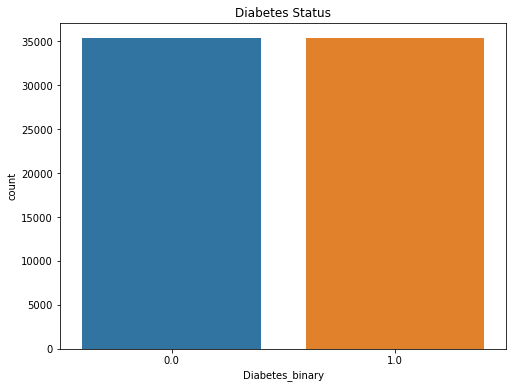

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(diab['Diabetes_binary'])
plt.title("Diabetes Status")
plt.show()

Text(0.5, 1.0, 'Diabetes Frequency for BP')

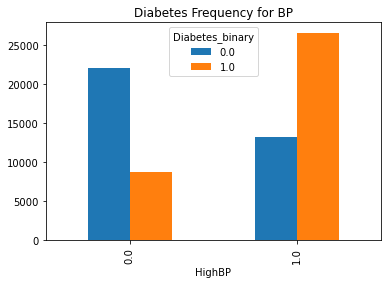

In [79]:
pd.crosstab(diab.HighBP,diab.Diabetes_binary).plot(kind = 'bar')
plt.title("Diabetes Frequency for BP")

<AxesSubplot:xlabel='BMI'>

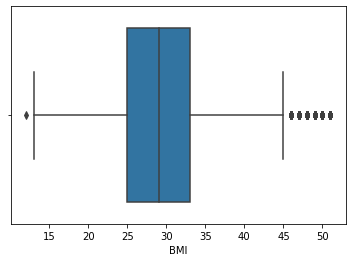

In [50]:
# Display the box plot to show the outliers
sns.boxplot(x=diab4["BMI"])

In [51]:
#Continuous features - BMI, MentHlth, PhysHlth, Age
#num = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
#Non-binary categorical features - GenHlth, Education, Income
#cat_col = ['GenHlth', 'Education', 'Income']

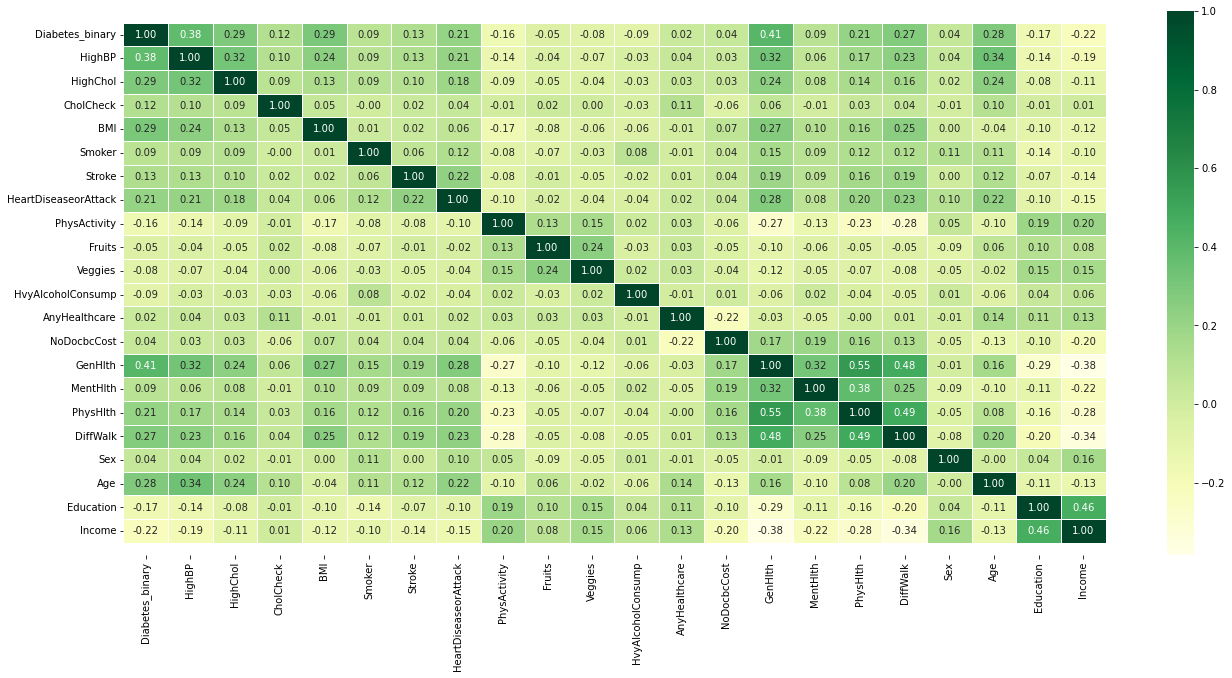

In [57]:
corr_matrix = diab.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [53]:
# Load the result dataset

HTResults = pd.read_csv(r"C:\Users\srini\satvik\HTResults.csv", header=0)
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[7200 2385]
 [2594 7021]]
Outcome values : 
 7200 2385 2594 7021
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.75      0.74      9585
           0       0.75      0.73      0.74      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.1 %
Precision : 73.5 %
Recall : 75.1 %
F1 Score : 0.743
Specificity or True Negative Rate : 73.0 %
Balanced Accuracy : 74.0 %
MCC : 0.481
roc_auc_score: 0.741


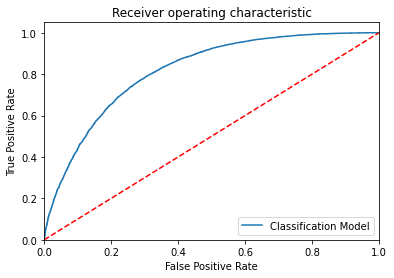

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[6024 3561]
 [3119 6496]]
Outcome values : 
 6024 3561 3119 6496
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.63      0.64      9585
           0       0.65      0.68      0.66      9615

    accuracy                           0.65     19200
   macro avg       0.65      0.65      0.65     19200
weighted avg       0.65      0.65      0.65     19200

Accuracy : 65.2 %
Precision : 65.9 %
Recall : 62.8 %
F1 Score : 0.643
Specificity or True Negative Rate : 67.6 %
Balanced Accuracy : 65.2 %
MCC : 0.304
roc_auc_score: 0.652


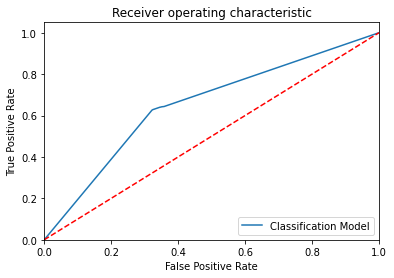

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7093 2492]
 [2871 6744]]
Outcome values : 
 7093 2492 2871 6744
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.74      0.73      9585
           0       0.73      0.70      0.72      9615

    accuracy                           0.72     19200
   macro avg       0.72      0.72      0.72     19200
weighted avg       0.72      0.72      0.72     19200

Accuracy : 72.1 %
Precision : 71.2 %
Recall : 74.0 %
F1 Score : 0.726
Specificity or True Negative Rate : 70.1 %
Balanced Accuracy : 72.0 %
MCC : 0.442
roc_auc_score: 0.721


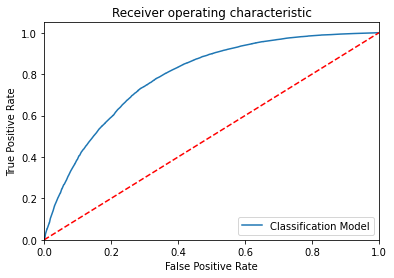

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7016 2569]
 [3013 6602]]
Outcome values : 
 7016 2569 3013 6602
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.73      0.72      9585
           0       0.72      0.69      0.70      9615

    accuracy                           0.71     19200
   macro avg       0.71      0.71      0.71     19200
weighted avg       0.71      0.71      0.71     19200

Accuracy : 70.9 %
Precision : 70.0 %
Recall : 73.2 %
F1 Score : 0.715
Specificity or True Negative Rate : 68.7 %
Balanced Accuracy : 71.0 %
MCC : 0.419
roc_auc_score: 0.709


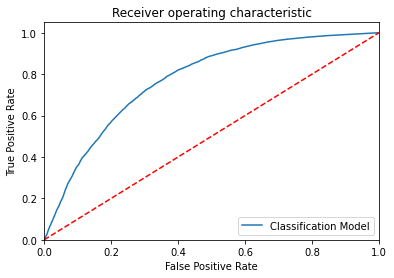

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6952 2633]
 [3164 6451]]
Outcome values : 
 6952 2633 3164 6451
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.73      0.71      9585
           0       0.71      0.67      0.69      9615

    accuracy                           0.70     19200
   macro avg       0.70      0.70      0.70     19200
weighted avg       0.70      0.70      0.70     19200

Accuracy : 69.8 %
Precision : 68.7 %
Recall : 72.5 %
F1 Score : 0.706
Specificity or True Negative Rate : 67.1 %
Balanced Accuracy : 69.8 %
MCC : 0.397
roc_auc_score: 0.698


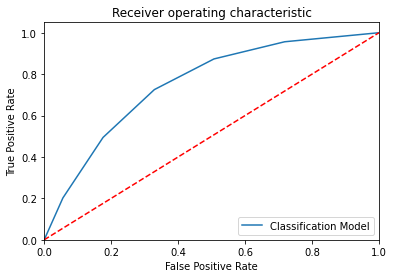

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier()
Confusion matrix : 
 [[6318 3267]
 [2704 6911]]
Outcome values : 
 6318 3267 2704 6911
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.66      0.68      9585
           0       0.68      0.72      0.70      9615

    accuracy                           0.69     19200
   macro avg       0.69      0.69      0.69     19200
weighted avg       0.69      0.69      0.69     19200

Accuracy : 68.9 %
Precision : 70.0 %
Recall : 65.9 %
F1 Score : 0.679
Specificity or True Negative Rate : 71.9 %
Balanced Accuracy : 68.9 %
MCC : 0.379
roc_auc_score: 0.689


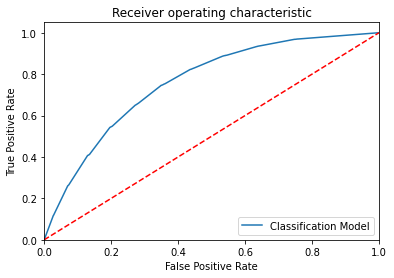

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[7347 2238]
 [2738 6877]]
Outcome values : 
 7347 2238 2738 6877
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      9585
           0       0.75      0.72      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.1 %
Precision : 72.9 %
Recall : 76.7 %
F1 Score : 0.747
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 74.1 %
MCC : 0.482
roc_auc_score: 0.741


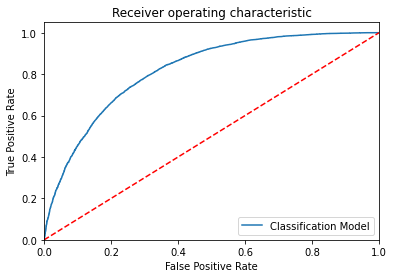

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[7373 2212]
 [2772 6843]]
Outcome values : 
 7373 2212 2772 6843
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      9585
           0       0.76      0.71      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.0 %
Precision : 72.7 %
Recall : 76.9 %
F1 Score : 0.747
Specificity or True Negative Rate : 71.2 %
Balanced Accuracy : 74.0 %
MCC : 0.482
roc_auc_score: 0.74


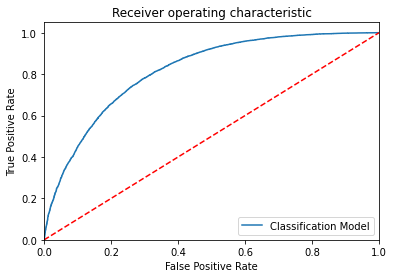

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6937 2648]
 [2738 6877]]
Outcome values : 
 6937 2648 2738 6877
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.72      0.72      9585
           0       0.72      0.72      0.72      9615

    accuracy                           0.72     19200
   macro avg       0.72      0.72      0.72     19200
weighted avg       0.72      0.72      0.72     19200

Accuracy : 71.9 %
Precision : 71.7 %
Recall : 72.4 %
F1 Score : 0.72
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 72.0 %
MCC : 0.439
roc_auc_score: 0.719


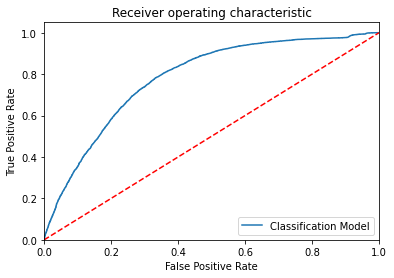

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[7639 1946]
 [3037 6578]]
Outcome values : 
 7639 1946 3037 6578
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.80      0.75      9585
           0       0.77      0.68      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.0 %
Precision : 71.6 %
Recall : 79.7 %
F1 Score : 0.754
Specificity or True Negative Rate : 68.4 %
Balanced Accuracy : 74.0 %
MCC : 0.484
roc_auc_score: 0.741


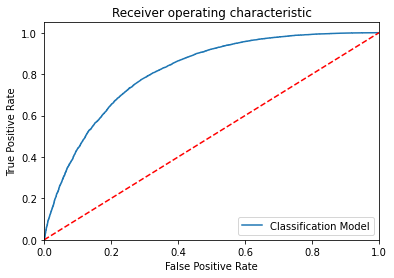

-----------------------------------------------------------------------------------------------------


In [54]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
modelBAG = BaggingClassifier()
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)


# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB,ModelSVM]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [55]:
# Results with comparing the all the algorithms 

HTResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7200,2385,2594,7021,0.741,0.735,0.751,0.743,0.730,0.481,0.740693,0.740
1,DecisionTreeClassifier(),6024,3561,3119,6496,0.652,0.659,0.628,0.643,0.676,0.304,0.652047,0.652
2,"(DecisionTreeClassifier(max_features='auto', r...",7093,2492,2871,6744,0.721,0.712,0.740,0.726,0.701,0.442,0.720707,0.720
3,"(ExtraTreeClassifier(random_state=52287929), E...",7016,2569,3013,6602,0.709,0.700,0.732,0.715,0.687,0.419,0.709306,0.710
4,KNeighborsClassifier(),6952,2633,3164,6451,0.698,0.687,0.725,0.706,0.671,0.397,0.698115,0.698
5,(DecisionTreeClassifier(random_state=260737601...,6318,3267,2704,6911,0.689,0.700,0.659,0.679,0.719,0.379,0.688964,0.689
6,([DecisionTreeRegressor(criterion='friedman_ms...,7347,2238,2738,6877,0.741,0.729,0.767,0.747,0.715,0.482,0.740873,0.741
7,LGBMClassifier(),7373,2212,2772,6843,0.740,0.727,0.769,0.747,0.712,0.482,0.740462,0.740
8,GaussianNB(),6937,2648,2738,6877,0.719,0.717,0.724,0.720,0.715,0.439,0.719486,0.720
9,SVC(probability=True),7639,1946,3037,6578,0.740,0.716,0.797,0.754,0.684,0.484,0.740557,0.740


In [56]:
# Results

PredResults = pd.DataFrame({'Diabetes_binary':y_test, 'Diabetes_binary_Pred':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = diab_bk.merge(PredResults, left_index=True, right_index=True)

# Display 10 records randomly

TestDataResults.sample(20)

,Diabetes_binary_x,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary_y,Diabetes_binary_Pred
29268,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0,0.0,0.0
59445,1.0,1.0,1.0,1.0,49.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,30.0,20.0,1.0,1.0,10.0,2.0,2.0,1.0,1.0
29609,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,7.0,0.0,0.0
53756,1.0,1.0,1.0,1.0,38.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,15.0,30.0,1.0,1.0,9.0,4.0,6.0,1.0,1.0
19433,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,20.0,20.0,0.0,0.0,4.0,6.0,4.0,0.0,0.0
40207,1.0,1.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,3.0,4.0,1.0,1.0
4556,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,3.0,5.0,8.0,0.0,0.0
60493,1.0,0.0,0.0,1.0,30.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0,1.0,1.0
6361,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,8.0,0.0,0.0
19537,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,8.0,6.0,7.0,0.0,0.0


Model Name:  LogisticRegression()
Confusion matrix : 
 [[7200 2385]
 [2594 7021]]
Outcome values : 
 7200 2385 2594 7021
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.75      0.74      9585
           0       0.75      0.73      0.74      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.1 %
Precision : 73.5 %
Recall : 75.1 %
F1 Score : 0.743
Specificity or True Negative Rate : 73.0 %
Balanced Accuracy : 74.0 %
MCC : 0.481
roc_auc_score: 0.741


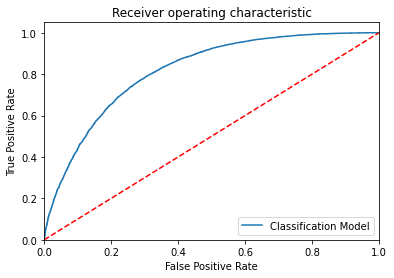

In [58]:
#modeling 
from sklearn.linear_model import LogisticRegression
models = LogisticRegression()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[6061 3524]
 [3104 6511]]
Outcome values : 
 6061 3524 3104 6511
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.63      0.65      9585
           0       0.65      0.68      0.66      9615

    accuracy                           0.65     19200
   macro avg       0.66      0.65      0.65     19200
weighted avg       0.66      0.65      0.65     19200

Accuracy : 65.5 %
Precision : 66.1 %
Recall : 63.2 %
F1 Score : 0.647
Specificity or True Negative Rate : 67.7 %
Balanced Accuracy : 65.5 %
MCC : 0.31
roc_auc_score: 0.655


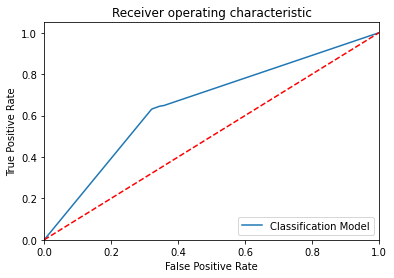

In [59]:
#modeling 
from sklearn.tree import DecisionTreeClassifier
models = DecisionTreeClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7118 2467]
 [2888 6727]]
Outcome values : 
 7118 2467 2888 6727
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.74      0.73      9585
           0       0.73      0.70      0.72      9615

    accuracy                           0.72     19200
   macro avg       0.72      0.72      0.72     19200
weighted avg       0.72      0.72      0.72     19200

Accuracy : 72.1 %
Precision : 71.1 %
Recall : 74.3 %
F1 Score : 0.727
Specificity or True Negative Rate : 70.0 %
Balanced Accuracy : 72.2 %
MCC : 0.443
roc_auc_score: 0.721


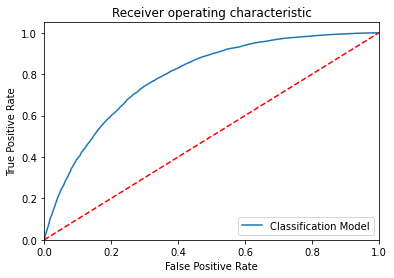

In [60]:
#modeling 
from sklearn.ensemble import RandomForestClassifier
models = RandomForestClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7035 2550]
 [3016 6599]]
Outcome values : 
 7035 2550 3016 6599
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.73      0.72      9585
           0       0.72      0.69      0.70      9615

    accuracy                           0.71     19200
   macro avg       0.71      0.71      0.71     19200
weighted avg       0.71      0.71      0.71     19200

Accuracy : 71.0 %
Precision : 70.0 %
Recall : 73.4 %
F1 Score : 0.717
Specificity or True Negative Rate : 68.6 %
Balanced Accuracy : 71.0 %
MCC : 0.421
roc_auc_score: 0.71


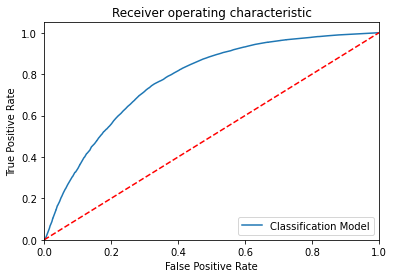

In [62]:
#modeling 
from sklearn.ensemble import ExtraTreesClassifier
models = ExtraTreesClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6952 2633]
 [3164 6451]]
Outcome values : 
 6952 2633 3164 6451
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.73      0.71      9585
           0       0.71      0.67      0.69      9615

    accuracy                           0.70     19200
   macro avg       0.70      0.70      0.70     19200
weighted avg       0.70      0.70      0.70     19200

Accuracy : 69.8 %
Precision : 68.7 %
Recall : 72.5 %
F1 Score : 0.706
Specificity or True Negative Rate : 67.1 %
Balanced Accuracy : 69.8 %
MCC : 0.397
roc_auc_score: 0.698


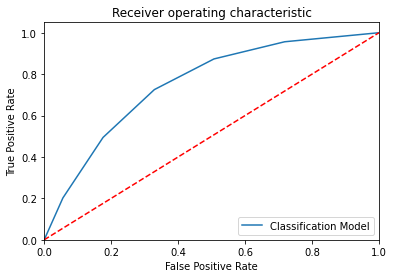

In [67]:
#modeling 
from sklearn.neighbors import KNeighborsClassifier
models =KNeighborsClassifier(n_neighbors=5)
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  GaussianNB()
Confusion matrix : 
 [[6937 2648]
 [2738 6877]]
Outcome values : 
 6937 2648 2738 6877
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.72      0.72      9585
           0       0.72      0.72      0.72      9615

    accuracy                           0.72     19200
   macro avg       0.72      0.72      0.72     19200
weighted avg       0.72      0.72      0.72     19200

Accuracy : 71.9 %
Precision : 71.7 %
Recall : 72.4 %
F1 Score : 0.72
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 72.0 %
MCC : 0.439
roc_auc_score: 0.719


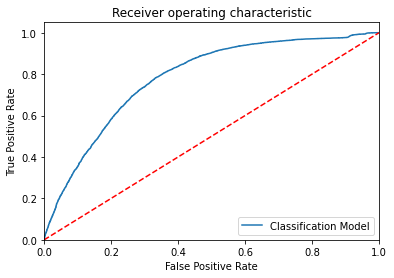

In [68]:
#modeling 
from sklearn.naive_bayes import GaussianNB
models = GaussianNB() 
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  BaggingClassifier()
Confusion matrix : 
 [[6373 3212]
 [2674 6941]]
Outcome values : 
 6373 3212 2674 6941
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.66      0.68      9585
           0       0.68      0.72      0.70      9615

    accuracy                           0.69     19200
   macro avg       0.69      0.69      0.69     19200
weighted avg       0.69      0.69      0.69     19200

Accuracy : 69.3 %
Precision : 70.4 %
Recall : 66.5 %
F1 Score : 0.684
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 69.4 %
MCC : 0.387
roc_auc_score: 0.693


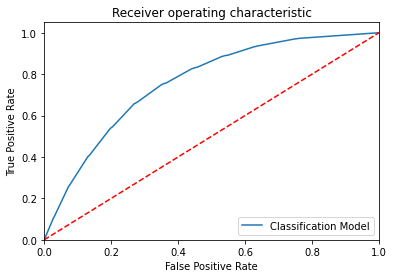

In [69]:
#modeling 
models= BaggingClassifier()
from sklearn.ensemble import BaggingClassifier
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  LGBMClassifier()
Confusion matrix : 
 [[7373 2212]
 [2772 6843]]
Outcome values : 
 7373 2212 2772 6843
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      9585
           0       0.76      0.71      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.0 %
Precision : 72.7 %
Recall : 76.9 %
F1 Score : 0.747
Specificity or True Negative Rate : 71.2 %
Balanced Accuracy : 74.0 %
MCC : 0.482
roc_auc_score: 0.74


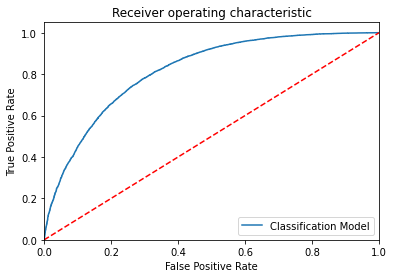

In [70]:
#modeling 
import lightgbm as lgb
models =lgb.LGBMClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[7347 2238]
 [2738 6877]]
Outcome values : 
 7347 2238 2738 6877
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      9585
           0       0.75      0.72      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.1 %
Precision : 72.9 %
Recall : 76.7 %
F1 Score : 0.747
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 74.1 %
MCC : 0.482
roc_auc_score: 0.741


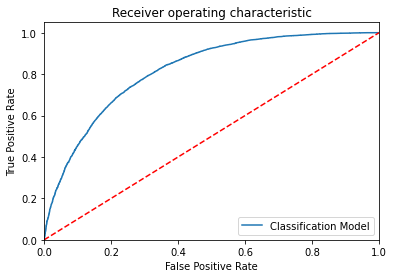

In [71]:
#modeling 
from sklearn.ensemble import GradientBoostingClassifier
models = GradientBoostingClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  SVC(probability=True)
Confusion matrix : 
 [[7639 1946]
 [3037 6578]]
Outcome values : 
 7639 1946 3037 6578
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.80      0.75      9585
           0       0.77      0.68      0.73      9615

    accuracy                           0.74     19200
   macro avg       0.74      0.74      0.74     19200
weighted avg       0.74      0.74      0.74     19200

Accuracy : 74.0 %
Precision : 71.6 %
Recall : 79.7 %
F1 Score : 0.754
Specificity or True Negative Rate : 68.4 %
Balanced Accuracy : 74.0 %
MCC : 0.484
roc_auc_score: 0.741


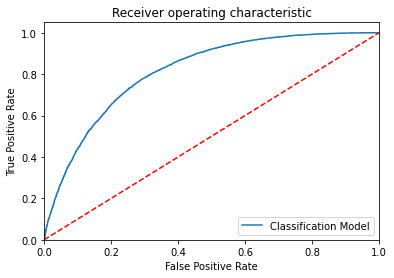

In [80]:
#modeling 
from sklearn.svm import SVC
models = SVC(probability=True)
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)

# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
